**Analyzing Sales time Series data in Pandas and Visualizing it using matplotlib and seaborn**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%cd "C:\Users\romathur\Documents\\salesData"

In [ ]:
salesData2010 = pd.read_csv('salesData2010.csv',header=0)
print(salesData2010.head(5))
print(salesData2010['Day'].count())

          Day  SalesA  SalesB  SalesC  SalesD
0  2010-01-01    2.27    3.09    1.25    4.07
1  2010-01-02    3.91    3.24    6.65    3.18
2  2010-01-03    3.12    3.19    4.63    3.78
3  2010-01-04    2.44    2.07    1.83    4.02
4  2010-01-05    1.13    1.87    1.08    1.56
365


In [ ]:
salesData2011 = pd.read_csv('salesData2011.csv',header=0)
salesData2011.head(5)

,Day,SalesA,SalesB,SalesC,SalesD
0,2011-01-01,5.49,1.03,1.47,3.27
1,2011-01-02,3.56,5.28,4.05,3.20
2,2011-01-03,2.51,3.32,1.94,2.79
3,2011-01-04,2.04,0.98,4.17,2.06
4,2011-01-05,1.07,2.35,1.17,1.87


Merging the datasets to create a single dataframe 

In [ ]:
dataset = pd.concat([salesData2010, salesData2011], axis=0)
print(dataset['Day'].count())

730


In [ ]:
dataset.describe()

,SalesA,SalesB,SalesC,SalesD
count,730.000000,730.000000,730.000000,730.000000
mean,2.584973,2.782685,3.312507,3.001685
std,1.382014,1.548422,1.776508,0.940446
min,0.920000,0.900000,0.910000,1.000000
25%,1.462500,1.525000,1.732500,2.310000
50%,2.175000,2.390000,3.015000,2.960000
75%,3.477500,3.687500,4.567500,3.650000
max,7.680000,9.320000,9.490000,6.080000


In [ ]:
dataset.isnull().sum(axis = 0)

Day       0
SalesA    0
SalesB    0
SalesC    0
SalesD    0
dtype: int64

In [ ]:
dataset['year'] = pd.DatetimeIndex(dataset['Day']).year
dataset['month'] = pd.DatetimeIndex(dataset['Day']).month
dataset['week'] = pd.DatetimeIndex(dataset['Day']).week
dataset['quarter'] = pd.DatetimeIndex(dataset['Day']).quarter
dataset['month_year'] = pd.to_datetime(dataset['Day']).dt.to_period('M')

dataset.head()

,Day,SalesA,SalesB,SalesC,SalesD,year,month,month_year,week,quarter
0,2010-01-01,2.27,3.09,1.25,4.07,2010,1,2010-01,53,1
1,2010-01-02,3.91,3.24,6.65,3.18,2010,1,2010-01,53,1
2,2010-01-03,3.12,3.19,4.63,3.78,2010,1,2010-01,53,1
3,2010-01-04,2.44,2.07,1.83,4.02,2010,1,2010-01,1,1
4,2010-01-05,1.13,1.87,1.08,1.56,2010,1,2010-01,1,1


In [ ]:
means = dataset.groupby(['year']).mean()
means

,SalesA,SalesB,SalesC,SalesD,month
year,,,,,
2010,2.643863,2.878192,3.195945,3.019671,6.526027
2011,2.526082,2.687178,3.429068,2.983699,6.526027


In [ ]:
means = dataset.groupby(['month_year']).mean()
means[['SalesA','SalesB','SalesC','SalesD']]

,SalesA,SalesB,SalesC,SalesD
month_year,,,,
2010-01,2.808387,2.812581,3.015161,2.909677
2010-02,2.612143,2.925714,3.520000,3.086071
2010-03,2.553226,3.184194,2.905484,2.936129
2010-04,2.926333,2.767000,2.961667,3.015667
2010-05,2.504194,2.784839,3.101613,3.055806
2010-06,2.580667,3.239667,3.158333,2.935667
2010-07,2.797097,2.167419,3.418710,3.244194
2010-08,2.370968,2.453226,3.420000,3.136129
2010-09,2.816000,2.798000,3.240000,3.031667


In [ ]:
means = dataset.groupby(['quarter','year']).mean()
means[['SalesA','SalesB','SalesC','SalesD']]

SalesA    SalesB    SalesC    SalesD
quarter year                                        
1       2010  2.659444  2.975778  3.134444  2.973667
        2011  2.521667  2.944667  3.193000  2.959556
2       2010  2.668571  2.928901  3.074176  3.002967
        2011  2.403846  2.684615  3.238352  2.984615
3       2010  2.659674  2.469348  3.360870  3.138478
        2011  2.652174  2.676196  3.696304  2.943478
4       2010  2.588370  3.141413  3.211630  2.962391
        2011  2.525217  2.448804  3.581413  3.046630

In [ ]:
means = dataset.groupby(['week','year']).mean()
means[['SalesA','SalesB','SalesC','SalesD']]

SalesA    SalesB    SalesC    SalesD
week year                                        
1    2010  2.360000  2.478571  3.257143  3.374286
     2011  2.262857  2.342857  3.507143  2.644286
2    2010  2.847143  2.834286  2.505714  3.024286
     2011  2.977143  3.340000  2.991429  3.112857
3    2010  2.807143  3.330000  2.478571  2.335714
     2011  2.192857  3.380000  3.034286  2.804286
4    2010  3.094286  2.452857  3.321429  2.575714
     2011  3.564286  3.317143  3.631429  2.961429
5    2010  2.028571  1.950000  4.320000  3.237143
     2011  1.937143  2.650000  4.535714  2.662857
6    2010  2.960000  3.331429  3.962857  2.951429
     2011  2.320000  3.077143  3.272857  2.838571
7    2010  2.032857  2.685714  3.385714  2.815714
     2011  2.751429  3.660000  3.327143  3.182857
8    2010  3.427143  3.735714  2.411429  3.340000
     2011  2.738571  2.772857  3.278571  2.878571
9    2010  2.631429  3.764286  2.464286  2.784286
     2011  2.340000  3.082857  2.684286  3.132857
10   2010  1.961429  2.951429  3.362857  3.070000
     2011  2.151429  2.108571  2.585714  3.121429
11   2010  1.805714  2.621429  3.191429  2.865714
     2011  2.004286  2.908571  3.540000  3.378571
12   2010  3.591429  3.634286  2.995714  3.075714
     2011  2.252857  2.485714  2.060000  2.601429
13   2010  2.898571  3.040000  3.572857  3.262857
     2011  3.257143  3.072857  3.298571  2.794286
14   2010  2.308571  2.975714  3.577143  2.762857
     2011  1.548571  3.060000  3.952857  2.960000
15   2010  2.932857  2.152857  2.525714  2.730000
     2011  2.720000  2.722857  3.587143  3.990000
...             ...       ...       ...       ...
38   2011  3.054286  3.814286  4.648571  2.580000
39   2010  3.057143  2.758571  2.637143  3.252857
     2011  3.552857  2.548571  2.495714  3.418571
40   2010  2.065714  3.848571  2.247143  2.528571
     2011  3.374286  3.038571  3.294286  2.824286
41   2010  2.935714  3.367143  3.107143  2.924286
     2011  2.691429  2.540000  2.960000  3.142857
42   2010  2.305714  3.650000  3.085714  2.865714
     2011  2.491429  2.448571  3.810000  2.712857
43   2010  3.270000  2.168571  3.328571  3.120000
     2011  1.575714  2.492857  4.287143  3.120000
44   2010  2.641429  3.227143  2.791429  3.912857
     2011  1.810000  2.218571  2.748571  3.168571
45   2010  2.751429  2.971429  3.928571  2.957143
     2011  3.377143  2.410000  5.472857  3.021429
46   2010  2.367143  2.835714  3.001429  2.574286
     2011  2.565714  2.810000  4.085714  3.058571
47   2010  2.231429  3.711429  3.591429  2.587143
     2011  2.462857  1.835714  3.131429  3.177143
48   2010  2.781429  3.004286  3.634286  3.272857
     2011  3.148571  2.064286  4.260000  3.008571
49   2010  2.662857  2.835714  2.888571  2.801429
     2011  2.165714  2.605714  3.591429  3.034286
50   2010  2.191429  2.432857  3.264286  3.075714
     2011  2.421429  3.105714  3.822857  2.285714
51   2010  2.485714  2.797143  3.198571  3.191429
     2011  2.725714  2.248571  3.741429  3.760000
52   2010  3.578000  3.808000  4.154000  2.744000
     2011  2.856250  2.295000  1.665000  3.185000
53   2010  3.100000  3.173333  4.176667  3.676667

[105 rows x 4 columns]

In [ ]:
df_melt = dataset.melt(id_vars =['Day', 'year','month','month_year','week','quarter'])  
print(df_melt.head(10))
df_melted = df_melt[['year','variable','value']]
print(df_melted.head(10))

          Day  year  month month_year  week  quarter variable  value
0  2010-01-01  2010      1    2010-01    53        1   SalesA   2.27
1  2010-01-02  2010      1    2010-01    53        1   SalesA   3.91
2  2010-01-03  2010      1    2010-01    53        1   SalesA   3.12
3  2010-01-04  2010      1    2010-01     1        1   SalesA   2.44
4  2010-01-05  2010      1    2010-01     1        1   SalesA   1.13
5  2010-01-06  2010      1    2010-01     1        1   SalesA   2.41
6  2010-01-07  2010      1    2010-01     1        1   SalesA   1.58
7  2010-01-08  2010      1    2010-01     1        1   SalesA   2.47
8  2010-01-09  2010      1    2010-01     1        1   SalesA   3.40
9  2010-01-10  2010      1    2010-01     1        1   SalesA   3.09
   year variable  value
0  2010   SalesA   2.27
1  2010   SalesA   3.91
2  2010   SalesA   3.12
3  2010   SalesA   2.44
4  2010   SalesA   1.13
5  2010   SalesA   2.41
6  2010   SalesA   1.58
7  2010   SalesA   2.47
8  2010   SalesA   3.40
9

In [ ]:
df_melted_mean = df_melted.groupby(['year','variable'])['value'].mean()
print(df_melted_mean.head(10))

year  variable
2010  SalesA      2.643863
      SalesB      2.878192
      SalesC      3.195945
      SalesD      3.019671
2011  SalesA      2.526082
      SalesB      2.687178
      SalesC      3.429068
      SalesD      2.983699
Name: value, dtype: float64


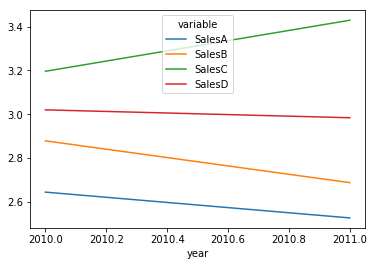

In [ ]:
df_melted.groupby(['year','variable'])['value'].mean().unstack().plot()

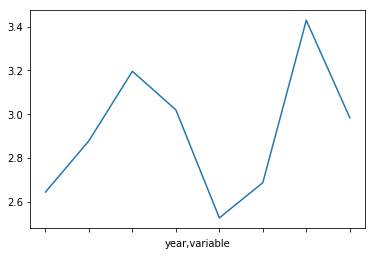

In [ ]:
df_melted.groupby(['year','variable'])['value'].mean().plot()